In [1]:
!python -m pip install konlpy

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 86 kB 3.7 MB/s 
     |████████████████████████████████| 448 kB 70.8 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0  54451      0 --:--:-- --:--:-- --:--:-- 54451


In [3]:
!bash ./mecab.sh

Installing automake (A dependency for mecab-ko)
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages

In [4]:
!curl -O https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.6M  100 19.6M    0     0  86.2M      0 --:--:-- --:--:-- --:--:-- 86.2M


In [5]:
import pandas as pd

total_data = pd.read_table('./naver_shopping.txt', names=['ratings', 'reviews'])
total_data.head(10)

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
5,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...
6,1,주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...
7,2,넉넉한 길이로 주문했는데도 안 맞네요 별로예요
8,2,보폴이 계속 때처럼 나오다가 지금은 안나네요~
9,2,110인데 전문속옷브랜드 위생팬티105보다 작은듯해요. 불편해요. 밴딩부분이 다 신...


In [6]:
total_data.info()

# RangeIndex = Non-null = 200000 -> 결측치가 없다 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ratings  200000 non-null  int64 
 1   reviews  200000 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [7]:
total_data.drop_duplicates(subset=['reviews'], inplace=True)  # inplace -> 변수를 덮어쓰기
len(total_data)

# 중복값 제거. 전체 값 200000에서 줄었음

199908

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_data = total_data['reviews']
y_data = total_data['ratings']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((149931,), (149931,), (49977,), (49977,))

In [11]:
y_data.value_counts()

5    81170
2    63948
1    36007
4    18783
Name: ratings, dtype: int64

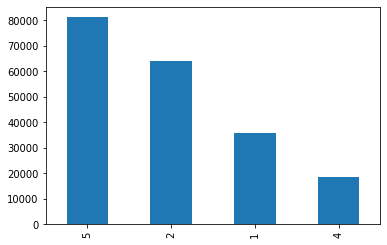

In [12]:
y_data.value_counts().plot(kind='bar')

# NLP

In [13]:
# 한글만 가져오기
print(x_train.str.replace('[^가-힣ㄱ-ㅎㅠ]', ''))

# 영문만 가져오기 [^a-zA-Z]

87920     아직사용한지틀밖에안되어서잘모르겠네요상품평들이좋아서기대하고있어요상품과함께편지도적어주시...
2851                               케이스호환률라하셨는데호환이안되네요두개나샀는데
20                                  가성비괜찮습니다바퀴가고정된다면별다섯개짜린데
75350                                        막심하게나오지는않는거같아요
98941     상품은만족합니다다만배송이아주맘에안듭니다역대최악의배송이었습니다배송지가아닌다른곳에내려놓...
                                ...                        
104359            정사이즈보다훨씬크게나왔네요깔창하나깔았는데도너무커서뒷굽깔창하나더사야할듯합니다
55605                        배송도빠르고원단도너무좋아요추가구입해야겠어요가격대비아주굿
64096     일회용만큼은차단하는데힘든점이있지만가볍게마트나산책갈때쓰기는괜찮아요흘러내려와서끈조절을하...
57433                                  강추하지안씁니다넘저렴한거구매하지마세요
166924    받아보고더만족스러운제품이예요끝단프릴도이뿌고스티지마감도고급스러워서이뻐요백화점이곳저곳제...
Name: reviews, Length: 149931, dtype: object


In [14]:
from konlpy.tag import  Mecab

In [15]:
mecab = Mecab()
print( mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는게 나을 것 같다.') )

['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '것', '같', '다', '.']


In [16]:
x_train_small = x_train[0:5000]

In [17]:
sentence= list()
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

for tok in x_train_small:
  encoded = mecab.morphs(tok)

  # 불용어 처리
  sentence.append([ item for item in encoded if item not in stopwords ])
  # for item in encoded:
  #   if item not in stopwords:
  #     sentence.append(item)


# Tokenize

In [18]:
import tensorflow as tf

In [19]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentence) 

In [20]:
print( tokenizer.word_index ) # 사전 만들기

{'.': 1, '네요': 2, '좋': 3, '어요': 4, '아요': 5, '는데': 6, '잘': 7, '있': 8, '구매': 9, '안': 10, '습니다': 11, '너무': 12, '했': 13, '배송': 14, '같': 15, '먹': 16, '거': 17, '어': 18, '!': 19, '되': 20, '합니다': 21, '재': 22, '요': 23, '않': 24, '기': 25, '것': 26, '~': 27, '..': 28, '없': 29, '쓰': 30, '았': 31, '해서': 32, '로': 33, '사용': 34, '으로': 35, '었': 36, '아': 37, '그냥': 38, '겠': 39, '나': 40, '지만': 41, '보다': 42, '면': 43, '보': 44, '만': 45, '어서': 46, '아서': 47, '주': 48, '해': 49, '제품': 50, '서': 51, ',': 52, '좀': 53, '가격': 54, '입니다': 55, '주문': 56, '만족': 57, '생각': 58, '해요': 59, '더': 60, '개': 61, '라': 62, '할': 63, '니': 64, '맛': 65, '많이': 66, '사이즈': 67, '받': 68, 'ㅠㅠ': 69, '사': 70, '?': 71, '시': 72, '샀': 73, '빠르': 74, '때': 75, '별로': 76, '왔': 77, '번': 78, '에서': 79, '작': 80, '음': 81, '다른': 82, '두': 83, '포장': 84, '맛있': 85, '맞': 86, '넘': 87, '상품': 88, '입': 89, '세요': 90, '부분': 91, '수': 92, '저렴': 93, '괜찮': 94, '던': 95, '~~': 96, '일': 97, '하나': 98, '^^': 99, '정말': 100, '에요': 101, '감사': 102, 'ㅠ': 103, '인데': 104, '아니': 105, '용': 1

In [21]:
print( tokenizer.word_counts ) # 전체 문장에서 단어가 몇번 반복됐는지 

OrderedDict([('아직', 121), ('사용', 375), ('2', 126), ('틀', 13), ('밖에', 7), ('안', 820), ('되', 475), ('어서', 304), ('잘', 878), ('모르', 98), ('겠', 328), ('네요', 1722), ('^^', 138), ('상', 23), ('품평', 12), ('좋', 1600), ('아서', 304), ('기대', 84), ('있', 835), ('어요', 1169), ('~', 407), ('상품', 167), ('함께', 13), ('편지', 4), ('적', 107), ('어', 523), ('주', 304), ('시', 193), ('ᆢ', 10), ('받', 224), ('기분', 38), ('았', 400), ('ㅎ', 66), ('케이스', 34), ('호환', 8), ('률', 2), ('100', 18), ('%', 9), ('라', 243), ('셨', 63), ('는데', 999), ('두', 178), ('개', 248), ('나', 324), ('샀', 191), ('가성', 52), ('비', 97), ('괜찮', 145), ('습니다', 765), ('바퀴', 6), ('고정', 44), ('된다면', 3), ('별', 42), ('다섯', 3), ('짜린데', 1), ('.', 3964), ('..', 405), ('막', 26), ('심하', 38), ('나오', 52), ('않', 438), ('거', 531), ('같', 596), ('아요', 1003), ('만족', 279), ('합니다', 475), ('다만', 21), ('배송', 695), ('아주', 114), ('맘', 93), ('듭니다', 29), ('역대', 1), ('최악', 40), ('었', 342), ('배송지', 4), ('아닌', 43), ('다른', 181), ('곳', 56), ('내려놓', 3), ('갔', 9), ('인수자', 1), ('확인', 43

In [22]:
total_cnt = len(tokenizer.word_index)  
rare_cnt = 0 #  2 미만으로 사용된 단어
total_freq, rare_freq = 0, 0

for key, value in tokenizer.word_counts.items():  # word_counts가 딕셔너리로 되있어서 뽑을 수 있음
  total_freq = total_freq + value
  if value <= 2:
      rare_cnt =  rare_cnt + 1
      rare_freq = rare_freq + value  


In [23]:
total_cnt, rare_cnt, (rare_cnt/total_cnt)*100, (rare_freq/total_freq)*100

# 전체 단어 수, 희귀 단어 수, 희귀 단어의 비중, 희귀 단어가 전체 단어 중에서 등장하는 빈도 비중

(8058, 5214, 64.70588235294117, 7.547013503437992)

In [24]:
vocab_size = total_cnt - rare_cnt  # 사전 단어 수

In [25]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(sentence)

In [26]:
x_train_small = tokenizer.texts_to_sequences(sentence)
print(x_train_small[0:3])

[[114, 35, 108, 756, 1221, 11, 21, 47, 8, 139, 40, 3, 100, 495, 805, 4, 48, 163, 9, 5, 28, 89, 757, 1837, 127, 19, 49, 73, 920, 89, 69, 320, 4, 32, 5, 204], [359, 1109, 1, 598, 1000, 63, 215, 7, 1109, 11, 21, 3, 84, 62, 41, 74, 7], [259, 141, 95, 12, 1389, 294, 2211, 305, 2212, 62, 1, 2, 29]]


In [27]:
len(x_train_small[0]), len(x_train_small[15]), len(x_train_small[40])

(36, 9, 21)

In [28]:
hist_len = [ len(words) for words in x_train_small ]

(array([ 75., 172., 298., 660., 354., 262., 254., 423., 161., 167., 153.,
        255.,  89.,  95.,  92., 166.,  90.,  86.,  79., 136.,  61.,  57.,
         64.,  99.,  48.,  43.,  90.,  36.,  40.,  39.,  71.,  26.,  31.,
         25.,  35.,  18.,  14.,  16.,  32.,  15.,  13.,  15.,  20.,   7.,
          6.,   4.,   3.,   2.,   2.,   1.]),
 array([ 2.  ,  3.26,  4.52,  5.78,  7.04,  8.3 ,  9.56, 10.82, 12.08,
        13.34, 14.6 , 15.86, 17.12, 18.38, 19.64, 20.9 , 22.16, 23.42,
        24.68, 25.94, 27.2 , 28.46, 29.72, 30.98, 32.24, 33.5 , 34.76,
        36.02, 37.28, 38.54, 39.8 , 41.06, 42.32, 43.58, 44.84, 46.1 ,
        47.36, 48.62, 49.88, 51.14, 52.4 , 53.66, 54.92, 56.18, 57.44,
        58.7 , 59.96, 61.22, 62.48, 63.74, 65.  ]),
 <a list of 50 Patch objects>)

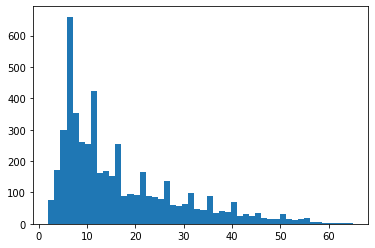

In [29]:
import matplotlib.pyplot as plt

plt.hist(hist_len, bins=50)

In [30]:
sum(hist_len) / len(x_train_small)

16.8994

In [31]:
x_train_small = tf.keras.preprocessing.sequence.pad_sequences(x_train_small, maxlen=50)

In [32]:
y_train_small = y_train[0:5000]

In [33]:
import numpy as np

y_train_small = np.array(y_train_small)-1 # 0부터 시작하게 바꿈
np.unique(y_train_small)  # 0~4 -> Dense=5

array([0, 1, 3, 4])

# Make model

In [34]:
model = tf.keras.Sequential()

# Input Layer 
model.add(tf.keras.layers.Embedding(input_dim= vocab_size, output_dim=30, input_length=50))

# Hidden Layer
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128) ))  # Bidirectional으로 랩핑을 하면 성능이 올라감

# Output Layer
model.add(tf.keras.layers.Dense(5, activation='softmax'))

# Gadget
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [35]:
model.fit(x_train_small, y_train_small, epochs=2, batch_size=256, validation_split=0.3, shuffle=True)

Epoch 1/2
14/14 [==============================] - 11s 525ms/step - loss: 1.4615 - accuracy: 0.3660 - val_loss: 1.3063 - val_accuracy: 0.3980
Epoch 2/2
14/14 [==============================] - 6s 456ms/step - loss: 1.2708 - accuracy: 0.4011 - val_loss: 1.2777 - val_accuracy: 0.3207


In [36]:
model.evaluate(x_train_small, y_train_small)

157/157 [==============================] - 3s 20ms/step - loss: 1.2722 - accuracy: 0.3202


[1.2722259759902954, 0.32019999623298645]

model.evaluate(x_train_small, y_train_small) 성능 비교
1. Bidirectional(LSTM(128)) - loss: 0.8787 - acc: 0.8382
2. LSTM(128) - loss: 0.9170 - acc: 0.8500
3. GRU - loss: 0.9265 - acc: 0.8436